<a href="https://colab.research.google.com/github/FerbeiPatricia/PMP-2024/blob/main/Lab9_PMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install pymc arviz


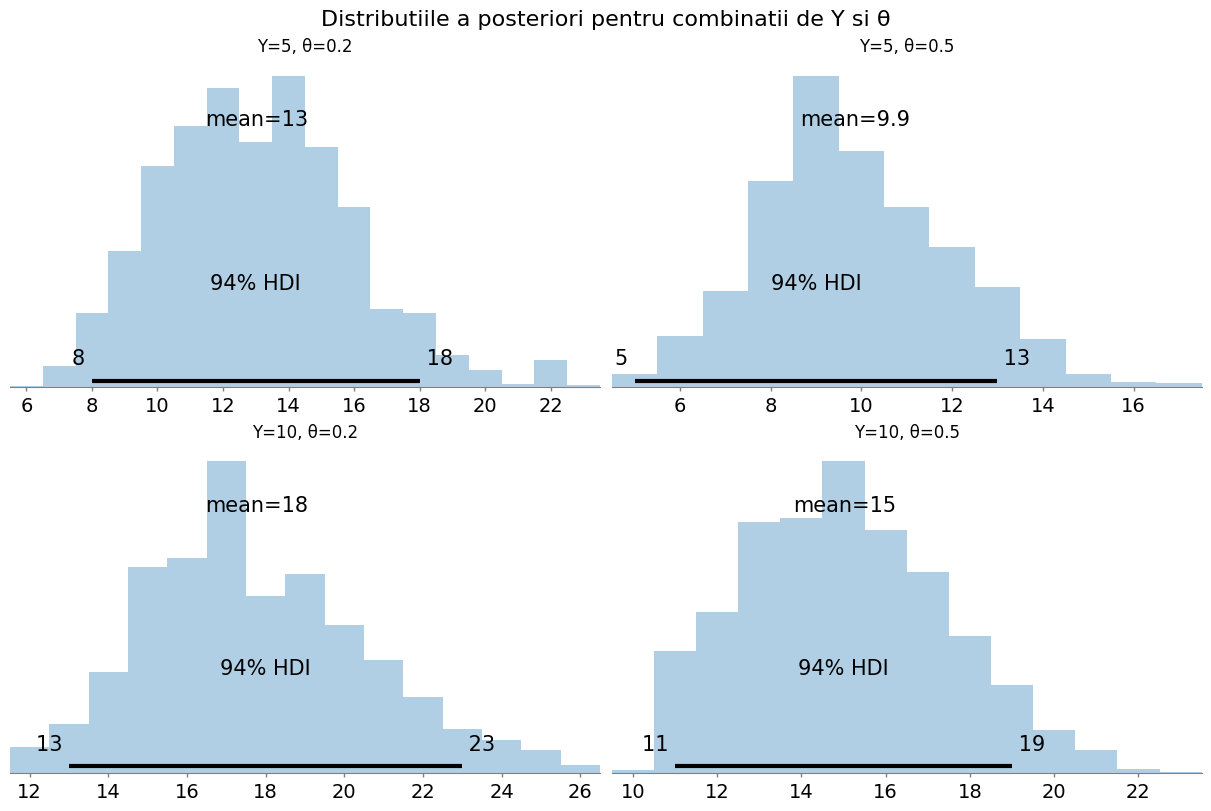

In [25]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

Y_values = [5, 10]
theta_values = [0.2, 0.5]

fig, axes = plt.subplots(len(Y_values), len(theta_values), figsize=(12, 8), constrained_layout=True)

for i, Y in enumerate(Y_values):
    for j, theta in enumerate(theta_values):
        with pm.Model() as model:
            # Distributia Poisson pentru numarul total de clienti
            n = pm.Poisson("n", mu=10)

#Distributia Binomiala pentru Y
            Y_obs = pm.Binomial("Y_obs", n=n, p=theta, observed=Y)

            trace = pm.sample(1000, return_inferencedata=True, progressbar=False)
        az.plot_posterior(trace, var_names=["n"], ax=axes[i, j])
        axes[i, j].set_title(f"Y={Y}, θ={theta}")

plt.suptitle("Distributiile a posteriori pentru combinatii de Y si θ", fontsize=16)
plt.show()

# Explicația efectului lui Y și θ asupra distribuției a posteriori

În acest model, folosim o distribuție a priori **Poisson(10)** pentru probabilitatea ca un client să cumpere un produs (\(\theta\)) și o distribuție de verosimilitate **Binomială** pentru numărul de clienți care cumpără produsul într-o zi dată.

### Efectul valorii lui Y:
- **Valori mici ale lui Y** (de exemplu, Y = 0) sugerează că probabilitatea de cumpărare este mică, iar acest lucru va reduce valoarea estimată a lui \(\theta\) în posterior.
- **Valori mari ale lui Y** (de exemplu, Y = 10) sugerează o probabilitate mai mare de cumpărare, iar posteriorul pentru \(\theta\) va reflecta acest lucru, conducând la estimări mai mari ale lui \(\theta\).
  
Prin urmare, valoarea lui \(Y\) influențează direct estimarea probabilității de cumpărare (\(\theta\)), cu valori mari ale lui \(Y\) ducând la o probabilitate mai mare de cumpărare.

### Efectul valorii lui θ:
- **Priorul Poisson(10)** reflectă informația noastră anterioară despre distribuția probabilității. Priorul sugerează că ne așteptăm ca \(\theta\) să fie în jur de 10, dar distribuția a posteriori este ajustată în funcție de valorile observate ale lui \(Y\).
- Pentru valori mici ale lui \(Y\), distribuția a posteriori a lui \(\theta\) se va concentra pe valori mai mici, iar pentru valori mari ale lui \(Y\), \(\theta\) va fi estimat ca fiind mai mare.

### Concluzie:
Distributia a posteriori a lui \(\theta\) este influențată atât de observațiile \(Y\), cât și de priorul Poisson. Valorile mici ale lui \(Y\) vor reduce estimarea lui \(\theta\), iar valorile mari ale lui \(Y\) vor crește estimarea lui \(\theta\). Această interacțiune între prior și datele observate este tipică pentru modelele Bayesiene și demonstrează puterea acestora de a integra informațiile anterioare și observațiile actuale.
